In [3]:
# loading the libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
# opening the data in pd dataframes

credit_data = pd.read_csv('/Users/georgekalfas/Documents/Term 1/Ditigal Technologies and Value Creation/3rd Individual assignment/GitHub upload/Credit_data.csv')
new_appl = pd.read_csv('/Users/georgekalfas/Documents/Term 1/Ditigal Technologies and Value Creation/3rd Individual assignment/GitHub upload/New_applicantions.csv')

In [5]:
# Checking the head of 24.000 customers 

credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
0,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,90000,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,3,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,4,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,5,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [6]:
# By analysing our dataframe we can realize that default_0 = 1 are the ones who couldn't pay and the default_0 = 0 are the ones who paid
# Here we are calculating the percentage of people that we should not be giving them loans and its 22%

np.mean(credit_data.default_0)

0.22108333333333333

In [7]:
# dropping ID column (unnecessary column)

credit_data = credit_data.drop(['ID'], axis = 1)

We will try to predict costumer default, by using only some of the key columns in the data set (plotting some of our variables to understand better our data):

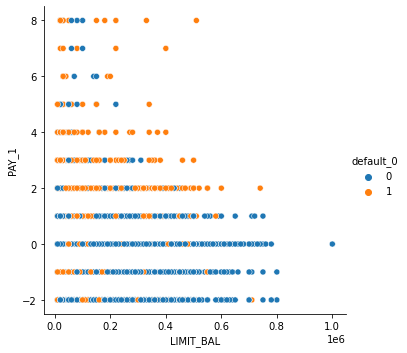

In [8]:
# LIMIT_BAL: Total amount of credit line with the bank (including all individual and family/supplementary credit) 
# and PAY_1: Repayment status 1 month ago – in September ( the values for PAY_1 vary because we have costumers paying and other who don't)

sns.relplot(x = "LIMIT_BAL", y = "PAY_1", hue = "default_0", data = credit_data)

#plotting the figure

plt.show()

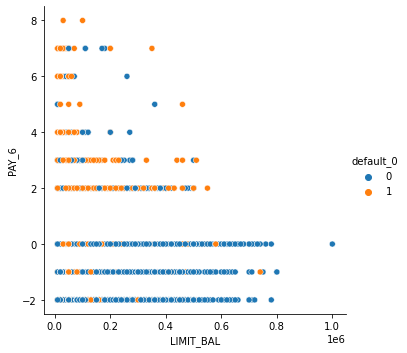

In [9]:
# running again the same but for PAY_6: repayment status 6 months ago (just to get e better view of comparison between 1 month and 6 months)

sns.relplot(x = "LIMIT_BAL", y = "PAY_6", hue = "default_0", data = credit_data)

#plotting the figure

plt.show()

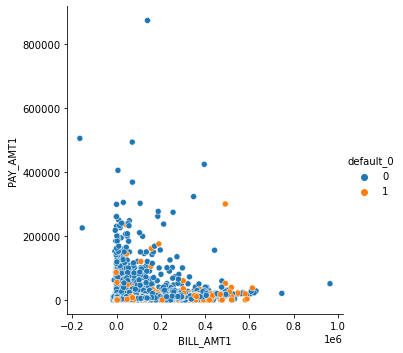

In [10]:
# plotting between bill amount and pay amount for both categories of default

sns.relplot(x="BILL_AMT1",y="PAY_AMT1",hue="default_0",data=credit_data)

# plotting the figure

plt.show()

Let's try to get a heatmap of our variables and see the correlations between them, if there are any.

In [11]:
# corr() method is used to find the pairwise correlation of all columns in the dataframe

corr = credit_data.corr()

In [12]:
# creating our heatmap 

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

# creating a function to pass in our figure

def cor_heatmap():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]


corr.style.background_gradient(cmap, axis=0)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlations Heatmap")\
    .set_precision(2)\
    .set_table_styles(cor_heatmap())

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_90298/1252692548.py:19: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=0)\


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
LIMIT_BAL,1.00,0.02,-0.22,-0.10,0.14,-0.27,-0.29,-0.28,-0.27,-0.25,-0.23,0.28,0.27,0.28,0.29,0.29,0.29,0.19,0.17,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,1.00,0.01,-0.03,-0.10,-0.06,-0.07,-0.07,-0.06,-0.05,-0.05,-0.03,-0.03,-0.02,-0.02,-0.01,-0.01,0.00,0.00,-0.01,0.00,-0.00,-0.00,-0.04
EDUCATION,-0.22,0.01,1.00,-0.15,0.18,0.10,0.12,0.11,0.11,0.10,0.08,0.02,0.02,0.01,-0.00,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.04,-0.04,0.03
MARRIAGE,-0.10,-0.03,-0.15,1.00,-0.42,0.02,0.02,0.03,0.03,0.04,0.04,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.02
AGE,0.14,-0.10,0.18,-0.42,1.00,-0.04,-0.05,-0.05,-0.05,-0.06,-0.05,0.06,0.06,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_1,-0.27,-0.06,0.10,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.19,0.18,-0.08,-0.06,-0.06,-0.07,-0.06,-0.06,0.32
PAY_2,-0.29,-0.07,0.12,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.24,0.24,0.22,0.22,0.22,0.22,-0.08,-0.06,-0.05,-0.05,-0.04,-0.03,0.26
PAY_3,-0.28,-0.07,0.11,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.00,-0.06,-0.05,-0.05,-0.04,-0.03,0.23
PAY_4,-0.27,-0.06,0.11,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.25,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.22
PAY_5,-0.25,-0.05,0.10,0.04,-0.06,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.00,-0.00,0.01,-0.06,-0.03,-0.02,0.21


A correlation heatmap is graphical representation of correlation matrix representing correlation between different variables. The value of correlation can take any values from -1 to 1. Identifing highly correlated variables will allow us to streamline the feature selection process. Understanding a dataset is very important when creating a model, and a heatmap is one of the many tools that can be used to achieve that.

By checking on our heatmap, we can realise that red means positive correlation and blue means negative one. The dark red are meant to have strong positive correaltion between them, while the blue ones mean they have a negative correlation. Also, we have some variables that are close to 0 and that means there is no correlation between these two variables. The 1 are the same variables. 

As the color becomes darker in either direction (red or blue) that means that those variables are more highly correlated and should not be paired together in the same model.

In order now to continue with our prediction we are going to apply some methods (like scaling/normalising and transforming some of our variables into dummy variables) to get better results

Before proceeding with our data cleaning and feature engineering, we are going to run a linear regression to our data by using scikit and see what we get.

In [13]:
y = credit_data[["default_0"]]

In [14]:
X = credit_data.drop(columns=["default_0"])

In [15]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [16]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

In [17]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

In [18]:
# getting the coefficients of our dataset, he higher the coefficient of variation, the greater the level of dispersion around the mean. 
# it is generally expressed as a percentage. The lower the value of the coefficient of variation, the more precise the estimate.

summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']

#highest coef

summary.head(n = 5)

,Variable,Coefficient
5,PAY_1,0.001147
6,PAY_2,0.000903
7,PAY_3,0.000821
8,PAY_4,0.000783
9,PAY_5,0.000729


In [19]:
# lowest coef

summary.tail(n = 5)

,Variable,Coefficient
17,PAY_AMT1,-0.000024
1,SEX,-0.000925
3,MARRIAGE,-0.000946
2,EDUCATION,-0.001152
4,AGE,-0.016516


As we see above there are also negative coefficients, because as the independent variable increases, the dependent variable tends to decrease. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable, while holding other variables in the model constant.

A receiver operating characteristic curve (or known as ROC curve) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Let's check it out.

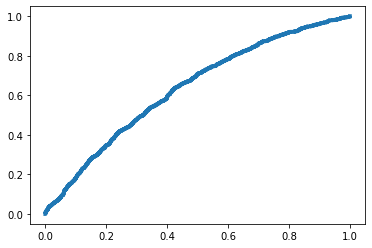

In [20]:
# plotting the data in order to check the grey area below our curve (known as AUC) measuring how good our model is before picking a threshold

y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [21]:
# measuring the grey area under the curve 

metrics.roc_auc_score(y_validation, y_pred_prob)

0.6347302427428545

Based on our data, we can directly compute the costs and profits of our predictions. 

1. True negative: We predicted no (they will not default), and they didn't default. The net profit then is £1500.
2. False negative: We predicted no, but they actually did default (also known as a "Type II classification error"). The net profit then is  -5000£ (we lose money).
3. False positive: We predicted yes, but they didn't default (known as a "Type I classification error"). The net profit then is £0.
4. True positive: We predicted yes (they will default), and the actually default. The net profit then is £0.

Given this, we can now calculate the profits we would get from the validation customers, using the confusion matrix (we start again with a threshold of 0.7):

Given this, we can now calculate the profits we would get from the validation customers, using the confusion matrix (to find the threshold we want to start with we run a loop to find it).

The above steps can also illustrate on the so called confusion matrix.

In [22]:
thres = []
profits = []
threshold = np.arange(0,1, 0.01)
for i in threshold:
    y_validation_pred = np.where(y_pred_prob < i, 0, 1)
    cm = metrics.confusion_matrix(y_validation, y_validation_pred)
    profit = cm[0][0] * 1500 + cm[1][0] * (-5000) + cm[0][1] * 0 + cm[1][1] * 0
    print("The profit at threshold " + str(i) + " is " + str(profit))
    profits.append(profit)
    thres.append(i)

# creating a dataframe with the threshold and profits

df = pd.DataFrame({'Threshold' : thres, 'Profits' : profits})

The profit at threshold 0.0 is 0
The profit at threshold 0.01 is 45000
The profit at threshold 0.02 is 92000
The profit at threshold 0.03 is 111000
The profit at threshold 0.04 is 144500
The profit at threshold 0.05 is 206500
The profit at threshold 0.06 is 259500
The profit at threshold 0.07 is 264000
The profit at threshold 0.08 is 327500
The profit at threshold 0.09 is 375500
The profit at threshold 0.1 is 440500
The profit at threshold 0.11 is 512000
The profit at threshold 0.12 is 560000
The profit at threshold 0.13 is 651500
The profit at threshold 0.14 is 711000
The profit at threshold 0.15 is 771000
The profit at threshold 0.16 is 843000
The profit at threshold 0.17 is 897000
The profit at threshold 0.18 is 921500
The profit at threshold 0.19 is 988500
The profit at threshold 0.2 is 1051500
The profit at threshold 0.21 is 1087000
The profit at threshold 0.22 is 1150500
The profit at threshold 0.23 is 1192500
The profit at threshold 0.24 is 1177500
The profit at threshold 0.25 i

In [23]:
# going to our dataframe and find the max profit in which line is it

df.idxmax(axis = 0, skipna = True)

Threshold    99
Profits      25
dtype: int64

In [24]:
# printing out the max profit with a threshold of 0.25 and a profit up to 1225000

print(df.loc[[25]])

    Threshold  Profits
25       0.25  1226500


In [25]:
# setting the correct threshold (0.25) in order to get our confusion matrix and accuracy

y_validation_pred = np.where(y_pred_prob < 0.25, 0, 1)

# confusion matrix 

print(metrics.confusion_matrix(y_validation, y_validation_pred))

# getting the accuracy

print(metrics.accuracy_score(y_validation,y_validation_pred))

[[2121 1593]
 [ 391  695]]
0.5866666666666667


Before continuing to predict our new applicants, we will pre-process/use of feature engineering in the data.

So from our data it is obvious that we will have to transform some of the them (dummy variables, use of scaling/normalizing method) in order to
be able to get better results we want (improvement of the ROC curve).

Changing some columns into dummy variables

In [26]:
#creating the dummy variables of "Sex, Education, Marriage, and Pay" (we know that for dummy variables n-1)

credit_data = pd.get_dummies(credit_data, columns = ['SEX'])
credit_data = credit_data.drop(["SEX_2"], axis = 1)
credit_data = credit_data.rename({'SEX_1': 'GENDER'}, axis=1) # here we will notice that instead of 1 = male and 2 = female, we have 1 = male and 0 = female

# continuing with education

credit_data = pd.get_dummies(credit_data, columns = ['EDUCATION']) 
credit_data = credit_data.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1) # so at this part, and based on our details of the data set we can notice that for education that we have 4 = other and 0, 5, 6 = unknown what we will do is to combine these two options because in case we have all 0 in our dataframe means that our costumer belongs in one of these two categories
credit_data = credit_data.rename({'EDUCATION_1' : 'GRADUATE', 'EDUCATION_2' : 'UNDERGRADUATE', 'EDUCATION_3' : 'HIGH SCHOOL', 'EDUCATION_4' : 'OTHER_UNKNOWN'}, axis = 1) # so in every column based on the name of the column if we find 1 means that this guys has this kind of education, otherwise its 0 means he belongs to a different category

# continuing with marriage
credit_data = pd.get_dummies(credit_data, columns = ['MARRIAGE'])
credit_data['MARRIAGE_0_3'] = (credit_data.MARRIAGE_0 | credit_data.MARRIAGE_3).astype(int) # same as education we combine other, unknown in one dummy variable because as far as we get in both married, single 0 we know he belongs to the other options
credit_data = credit_data.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1)
credit_data = credit_data.rename({'MARRIAGE_1' : 'MARRIED', 'MARRIAGE_2' : 'SINGLE', 'MARRIAGE_0_3' : 'NOT MARRIED-NOT SINGLE-OTHER'}, axis = 1) # same as education about 1 and 0 (the explanation), so if for both cases is 0 we know that our costumer belongs to other or unknown

# last creating the pay into dummies too

credit_data["PAY_1"] = credit_data["PAY_1"].replace(-2, 0).replace( -1, 0)
credit_data["PAY_1"] = credit_data["PAY_1"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

credit_data["PAY_2"] = credit_data["PAY_2"].replace(-2, 0).replace(-1, 0)
credit_data["PAY_2"] = credit_data["PAY_2"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

credit_data["PAY_3"] = credit_data["PAY_3"].replace(-2, 0).replace(-1, 0)
credit_data["PAY_3"] = credit_data["PAY_3"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

credit_data["PAY_4"] = credit_data["PAY_4"].replace(-2, 0).replace(-1, 0)
credit_data["PAY_4"] = credit_data["PAY_4"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

credit_data["PAY_5"] = credit_data["PAY_5"].replace(-2, 0).replace(-1, 0)
credit_data["PAY_5"] = credit_data["PAY_5"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

credit_data["PAY_6"] = credit_data["PAY_6"].replace(-2, 0).replace(-1, 0)
credit_data["PAY_6"] = credit_data["PAY_6"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

Scaling/normalizing limit balance, bill amount and pay amount 

In [27]:
#scaling limit bal, bill amt and pay amt 

credit_data[['LIMIT_BAL']] = preprocessing.scale(credit_data[['LIMIT_BAL']])

credit_data[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6'
]] = preprocessing.scale(credit_data[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6'
]])

credit_data[[
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6'
]] = preprocessing.scale(credit_data[[
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6'
]])

In [28]:
# checking our new dataframe with the new columns 

credit_data

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,default_0,GENDER,GRADUATE,UNDERGRADUATE,HIGH SCHOOL,OTHER_UNKNOWN,MARRIED,SINGLE,NOT MARRIED-NOT SINGLE-OTHER
0,-1.138345,24,1,1,0,0,0,0,-0.640803,-0.646348,...,-0.289940,1,0,0,1,0,0,1,0,0
1,-0.599489,34,0,0,0,0,0,0,-0.296915,-0.492875,...,-0.015424,0,0,0,1,0,0,0,1,0
2,-0.907406,37,0,0,0,0,0,0,-0.055884,-0.012355,...,-0.235037,0,0,0,1,0,0,1,0,0
3,-0.907406,57,0,0,0,0,0,0,-0.576930,-0.610273,...,-0.252661,0,1,0,1,0,0,1,0,0
4,-0.907406,37,0,0,0,0,0,0,0.180517,0.111772,...,-0.246018,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.676468,34,1,1,1,1,1,1,0.291277,0.401706,...,-0.070327,1,1,0,1,0,0,0,1,0
23996,-0.137612,43,0,0,0,0,0,0,-0.671083,-0.664245,...,-0.289940,0,1,0,0,1,0,0,1,0
23997,-1.061365,37,1,1,1,0,0,0,-0.645529,-0.642780,...,-0.119740,1,1,0,1,0,0,0,1,0
23998,-0.676468,41,1,0,0,0,0,0,-0.716272,0.411132,...,-0.190895,1,1,0,0,1,0,1,0,0


We are going now to rerun our data with the transformations in order to see how much our profits have been improved.

In [29]:
y = credit_data[["default_0"]]

In [30]:
X = credit_data.drop(columns=["default_0"])

In [31]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [32]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

In [33]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

In [34]:
# getting the coefficients  

summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary.head(n=5)

,Variable,Coefficient
2,PAY_1,1.285347
21,GRADUATE,0.820563
22,UNDERGRADUATE,0.806026
23,HIGH SCHOOL,0.739316
5,PAY_4,0.403128


In [35]:
summary.tail(n=5)

,Variable,Coefficient
14,PAY_AMT1,-0.131624
0,LIMIT_BAL,-0.184001
15,PAY_AMT2,-0.252733
26,SINGLE,-0.256039
24,OTHER_UNKNOWN,-0.604961


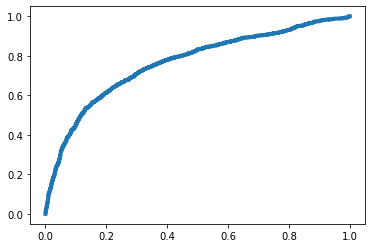

In [36]:
# plotting the data in order to check if there was an imporvement in the grey area below our curve measuring how good our model is before picking a threshold

y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [37]:
print(metrics.roc_auc_score(y_validation, y_pred_prob))

0.763274023628677


Finding the best threshold in our final model.

In [38]:
thres = []
profits = []
threshold = np.arange(0,1, 0.01)

for i in threshold:
    y_validation_pred = np.where(y_pred_prob < i, 0, 1)
    cm = metrics.confusion_matrix(y_validation, y_validation_pred)
    profit = cm[0][0] * 1500 + cm[1][0] * (-5000) + cm[0][1] * 0 + cm[1][1] * 0
    print("The profit at threshold " + str(i) + " is " + str(profit))
    profits.append(profit)
    thres.append(i)

# creating a dataframe for threshold and profit 

df = pd.DataFrame({'Threshold' : thres, 'Profits' : profits})

The profit at threshold 0.0 is 0
The profit at threshold 0.01 is 10500
The profit at threshold 0.02 is 17500
The profit at threshold 0.03 is 24500
The profit at threshold 0.04 is 61000
The profit at threshold 0.05 is 94500
The profit at threshold 0.06 is 158500
The profit at threshold 0.07 is 253000
The profit at threshold 0.08 is 358000
The profit at threshold 0.09 is 488000
The profit at threshold 0.1 is 590500
The profit at threshold 0.11 is 740500
The profit at threshold 0.12 is 1055500
The profit at threshold 0.13 is 1411000
The profit at threshold 0.14 is 1761000
The profit at threshold 0.15 is 2028000
The profit at threshold 0.16 is 2239000
The profit at threshold 0.17 is 2300500
The profit at threshold 0.18 is 2363000
The profit at threshold 0.19 is 2366500
The profit at threshold 0.2 is 2343000
The profit at threshold 0.21 is 2344500
The profit at threshold 0.22 is 2330000
The profit at threshold 0.23 is 2343000
The profit at threshold 0.24 is 2337000
The profit at threshold 0

In [39]:
df.idxmax(axis = 0, skipna = True)

Threshold    99
Profits      19
dtype: int64

In [40]:
print(df.loc[[19]])

    Threshold  Profits
19       0.19  2366500


The max profit at a threshold of 0.19 is up to 2371500.

In [41]:
y_validation_pred = np.where(y_pred_prob < 0.19, 0, 1)

In [42]:
# getting the confusion matrix and the accuracy of our model after the transformations

print(metrics.confusion_matrix(y_validation, y_validation_pred))
print(metrics.accuracy_score(y_validation,y_validation_pred))

[[2901  813]
 [ 397  689]]
0.7479166666666667


So based on the confusion metrics what we have above is:

True Negatives(TN): 2901

False Positives(FP): 813

False Negatives(FN): 396

True Positives(TP): 690

And the Accuracy classification score is: 0748125.

If we compare the two dataframes (before and after the transformations) we will notice that our accuracy has been improved up to close 0.2.

Now, it's time to predict our new applicants based on the results of our model above.

In [43]:
new_appl.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Unnamed: 24
0,n1000-1,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770,NaN
1,n1000-2,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0.0,0.0,0.0,0,0.0,0,NaN
2,n1000-3,150000,1,1,2,27,0,0,0,0,...,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800,NaN
3,n1000-4,20000,1,2,1,38,0,0,0,0,...,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0,NaN
4,n1000-5,400000,1,2,1,34,-1,-1,-1,-1,...,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712,NaN


Starting with some transformations like getting dummy variables and scaling/normalising in our new dataframe

In [44]:
#creating the dummy variables of "Sex, Education, Marriage, and Pay"

new_appl = pd.get_dummies(new_appl, columns = ['SEX'])
new_appl = new_appl.drop(["SEX_2"], axis = 1)
new_appl = new_appl.rename({'SEX_1': 'GENDER'}, axis=1) # here we will notice that instead of 1 = male and 2 = female, we have 1 = male and 0 = female

# continuing with education

new_appl = pd.get_dummies(new_appl, columns = ['EDUCATION']) 
new_appl = new_appl.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1) # so at this part, and based on our details of the data set we can notice that for education that we have 4 = other and 0, 5, 6 = unknown what we will do is to combine these two options because in case we have all 0 in our dataframe means that our costumer belongs in one of these two categories
new_appl = new_appl.rename({'EDUCATION_1' : 'GRADUATE', 'EDUCATION_2' : 'UNDERGRADUATE', 'EDUCATION_3' : 'HIGH SCHOOL', 'EDUCATION_4' : 'OTHER_UNKNOWN'}, axis = 1) # so in every column based on the name of the column if we find 1 means that this guys has this kind of education, otherwise its 0 means he belongs to a different category

# continuing with marriage
new_appl = pd.get_dummies(new_appl, columns = ['MARRIAGE'])
new_appl['MARRIAGE_0_3'] = (new_appl.MARRIAGE_0 | new_appl.MARRIAGE_3).astype(int) # same as education we combine other, unknown in one dummy variable because as far as we get in both married, single 0 we know he belongs to the other options
new_appl = new_appl.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1)
new_appl = new_appl.rename({'MARRIAGE_1' : 'MARRIED', 'MARRIAGE_2' : 'SINGLE', 'MARRIAGE_0_3' : 'NOT MARRIED-NOT SINGLE-OTHER'}, axis = 1) # same as education about 1 and 0 (the explanation), so if for both cases is 0 we know that our costumer belongs to other or unknown

# last creating the pay into dummies too

new_appl["PAY_1"] = new_appl["PAY_1"].replace(-2, 0).replace( -1, 0)
new_appl["PAY_1"] = new_appl["PAY_1"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

new_appl["PAY_2"] = new_appl["PAY_2"].replace(-2, 0).replace(-1, 0)
new_appl["PAY_2"] = new_appl["PAY_2"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

new_appl["PAY_3"] = new_appl["PAY_3"].replace(-2, 0).replace(-1, 0)
new_appl["PAY_3"] = new_appl["PAY_3"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

new_appl["PAY_4"] = new_appl["PAY_4"].replace(-2, 0).replace(-1, 0)
new_appl["PAY_4"] = new_appl["PAY_4"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

new_appl["PAY_5"] = new_appl["PAY_5"].replace(-2, 0).replace(-1, 0)
new_appl["PAY_5"] = new_appl["PAY_5"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

new_appl["PAY_6"] = new_appl["PAY_6"].replace(-2, 0).replace(-1, 0)
new_appl["PAY_6"] = new_appl["PAY_6"].replace(2, 1).replace(3, 1).replace(4, 1).replace(5, 1).replace(6, 1).replace(7, 1).replace(8, 1).replace(9, 1)

Scaling/normalizing limit balance, bill amount and pay amount.

In [45]:
#scaling limit bal, bill amt and pay amt 

new_appl[['LIMIT_BAL']] = preprocessing.scale(new_appl[['LIMIT_BAL']])

new_appl[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6'
]] = preprocessing.scale(new_appl[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6'
]])

new_appl[[
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6'
]] = preprocessing.scale(new_appl[[
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6'
]])

In [46]:
new_appl.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,Unnamed: 24,GENDER,GRADUATE,UNDERGRADUATE,HIGH SCHOOL,OTHER_UNKNOWN,MARRIED,SINGLE,NOT MARRIED-NOT SINGLE-OTHER
0,n1000-1,2.632642,29,0,0,0,0,0,0,4.532902,...,0.734057,NaN,1,1,0,0,0,0,1,0
1,n1000-2,0.362718,29,0,0,0,0,0,0,-0.716121,...,-0.341001,NaN,1,1,0,0,0,0,1,0
2,n1000-3,-0.106921,27,0,0,0,0,0,0,0.510798,...,-0.278543,NaN,1,1,0,0,0,0,1,0
3,n1000-4,-1.124473,38,0,0,0,0,0,0,-0.459736,...,-0.341001,NaN,1,0,1,0,0,1,0,0
4,n1000-5,1.849910,34,0,0,0,0,0,0,-0.435671,...,0.104949,NaN,1,0,1,0,0,1,0,0


In [47]:
# drop unnecessary columns

new_appl = new_appl.drop(['Unnamed: 24'], axis = 1)
new_appl1 = new_appl.drop(['ID'], axis = 1)

In [48]:
# checking the columns of our dataframe 

new_appl1.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,GENDER,GRADUATE,UNDERGRADUATE,HIGH SCHOOL,OTHER_UNKNOWN,MARRIED,SINGLE,NOT MARRIED-NOT SINGLE-OTHER
0,2.632642,29,0,0,0,0,0,0,4.532902,5.458975,...,0.443790,0.734057,1,1,0,0,0,0,1,0
1,0.362718,29,0,0,0,0,0,0,-0.716121,-0.717552,...,-0.285717,-0.341001,1,1,0,0,0,0,1,0
2,-0.106921,27,0,0,0,0,0,0,0.510798,0.573270,...,-0.195630,-0.278543,1,1,0,0,0,0,1,0
3,-1.124473,38,0,0,0,0,0,0,-0.459736,-0.427226,...,-0.277759,-0.341001,1,0,1,0,0,1,0,0
4,1.849910,34,0,0,0,0,0,0,-0.435671,-0.572652,...,0.136548,0.104949,1,0,1,0,0,1,0,0


Now we will follow the same steps by applying our predictions from before to the new applicants.

In [49]:
x_prediction = new_appl1

In [50]:
# checking all the probabilities before creating a dataframe with only probabilities and default costumers only

y_pred_prob = classifier_LR.predict_proba(x_prediction)[:,1]
y_pred_prob

array([3.34020381e-02, 1.38227933e-01, 1.28201589e-01, 1.97066418e-01,
       8.67576409e-02, 3.72842676e-01, 2.46955204e-01, 1.33720195e-01,
       5.37817929e-01, 1.60785094e-01, 8.16329921e-02, 1.17530557e-01,
       1.05330145e-01, 1.19789815e-01, 2.72265391e-01, 1.49788362e-01,
       1.63732985e-01, 1.56499422e-01, 6.45401550e-01, 2.85663261e-01,
       1.55355729e-01, 3.80947293e-01, 1.56649870e-01, 4.56316239e-01,
       1.42779231e-01, 1.19891968e-01, 1.63286640e-01, 1.04539757e-01,
       1.83321257e-01, 1.69274374e-01, 1.42244328e-01, 7.23867767e-01,
       4.00360833e-01, 2.02379969e-01, 4.16298748e-01, 3.18162068e-01,
       1.43047694e-01, 3.40516716e-01, 1.72892051e-01, 4.31071444e-01,
       7.17605298e-01, 4.30981959e-01, 1.34016834e-01, 1.96321758e-01,
       1.17765015e-01, 1.49702201e-01, 1.62607566e-01, 1.12955345e-01,
       1.53383377e-01, 6.56327275e-04, 1.39389205e-01, 1.75610739e-01,
       1.75506408e-01, 1.19608300e-01, 1.48031585e-01, 1.31616722e-01,
      

In [51]:
# here we using the opposite of 0, 1(from our first dataset) because based on our data 1 = issue credit and 0 = do not issue
# use of the previous threshold at 0.19

y_validation_pred = np.where(y_pred_prob < 0.19, 1, 0)

In [52]:
print(*y_validation_pred, sep = " ")

1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 

In [53]:
# now we are going to add the y_validation_pred in a dataframe with the id and the probabilities 

final_df = pd.DataFrame({'ID' : new_appl['ID'], 'Issued' : y_validation_pred, 'Probabilities': y_pred_prob})
final_df

,ID,Issued,Probabilities
0,n1000-1,1,0.033402
1,n1000-2,1,0.138228
2,n1000-3,1,0.128202
3,n1000-4,0,0.197066
4,n1000-5,1,0.086758
...,...,...,...
995,n1000-996,1,0.064146
996,n1000-997,0,0.516348
997,n1000-998,0,0.442018
998,n1000-999,1,0.142904


In [54]:
# getting the percentage of people that are issued the loan

np.mean(final_df.Issued)

0.682

Looks like our percentage of people who should be issued credit is up to 68%.

In [55]:
# now we are going to sort our dataframe based on the probabilities in order to find the "best" and "worst" clients (of the ones who are issued credit)

final_df = final_df[final_df['Issued'] == 1].sort_values('Probabilities', ascending = True)
final_df

,ID,Issued,Probabilities
49,n1000-50,1,0.000656
673,n1000-674,1,0.001323
968,n1000-969,1,0.002000
444,n1000-445,1,0.007171
796,n1000-797,1,0.009024
...,...,...,...
894,n1000-895,1,0.188399
475,n1000-476,1,0.188549
374,n1000-375,1,0.188596
698,n1000-699,1,0.189154


Based on the results above we can find the 3 "best" clients and the 3 "worst" ones. The ones with the lowest probability are the ones we suggest that they should be issued with a loan (n1000-50, n1000-674, n1000-969), and the ones with the highest probability are the ones that we should try avoid giving them the loan (n1000-699, n1000-779, n1000-933).